How to conduct commonly used inferential statistical tests in R?

* The chi-squared test of independence, which is a statistical test to      understand whether there is a relationship between two categorical        variables. 
* The chi-squared test of independence is one of a few bivariate, or        two-variable, tests that are widely used in statistical analyses across   many fields.

NOTE: 

* Before conducting any sort of inferential analyses that use sample data   to understand a population, it is a best practice to get to know the      sample data using descriptive statistics and graphics. This step in       research is often called exploratory data analysis or EDA. 
* The descriptive statistics for EDA examining categorical variables are    frequencies and percentages

In [1]:
import pyreadstat

# Specify the path to the .sav file
file_path = "pew_apr_19-23_2017_weekly_ch5.sav"

# Read the .sav file
vote, meta = pyreadstat.read_sav(file_path)

In [4]:
vote.head()

,case_id,week,state,metro,region,division,date,pew1rot,pew1arot,pew1a,...,polview,regvote,c3a,sex,religion,ident,c1a,bornus,qnco3,popwght
0,10000053,816.0,SC,3.0,3.0,5.0,170419,EDBCA,1.0,2.0,...,3.0,1.0,1.0,2.0,1.0,1.0,1.0,NaN,NaN,1.5468
1,10000054,816.0,PA,2.0,1.0,2.0,170419,ABECD,1.0,1.0,...,1.0,1.0,1.0,2.0,90.0,1.0,3.0,NaN,NaN,0.4379
2,10000055,816.0,WV,1.0,3.0,5.0,170419,ECABD,2.0,9.0,...,2.0,1.0,1.0,1.0,99.0,1.0,NaN,NaN,NaN,1.1530
3,10000056,816.0,MI,3.0,2.0,3.0,170419,BCDAE,1.0,2.0,...,4.0,1.0,1.0,2.0,2.0,1.0,1.0,NaN,NaN,0.4024
4,10000057,816.0,GA,3.0,3.0,5.0,170419,CABDE,2.0,1.0,...,1.0,1.0,1.0,2.0,1.0,1.0,0.0,NaN,NaN,0.2671


In [5]:
# Select variables of interest
vote_cleaned = vote[['pew1a', 'pew1b', 'race', 'sex', 'mstatus', 'ownhome', 'employ', 'polparty']]

In [6]:
vote_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pew1a     1028 non-null   float64
 1   pew1b     1028 non-null   float64
 2   race      1028 non-null   float64
 3   sex       1028 non-null   float64
 4   mstatus   1028 non-null   float64
 5   ownhome   1028 non-null   float64
 6   employ    1028 non-null   float64
 7   polparty  1028 non-null   float64
dtypes: float64(8)
memory usage: 64.4 KB


In [10]:
import pandas as pd

# Select variables of interest and clean them
vote_cleaned = vote[['pew1a', 'pew1b', 'race', 'sex', 'mstatus', 'ownhome', 'employ', 'polparty']]

# Clean and transform variables
vote_cleaned['pew1a'] = vote_cleaned['pew1a'].replace({1: 'Register to vote', 2: 'Make easy to vote', 5: None, 9: None})
vote_cleaned = vote_cleaned.rename(columns={'pew1a': 'ease.vote'})

vote_cleaned['pew1b'] = vote_cleaned['pew1b'].replace({1: 'Require to vote', 2: 'Choose to vote', 5: None, 9: None})
vote_cleaned = vote_cleaned.rename(columns={'pew1b': 'require.vote'})

vote_cleaned['race'] = vote_cleaned['race'].replace({1: 'White non-Hispanic', 2: 'Black non-Hispanic',
                                                    3: 'Hispanic', 4: 'Hispanic', 5: 'Hispanic',
                                                    6: 'Other', 7: 'Other', 8: 'Other', 9: 'Other',
                                                    10: 'Other', 99: None})

vote_cleaned['sex'] = vote_cleaned['sex'].replace({1: 'Male', 2: 'Female'})

vote_cleaned['ownhome'] = vote_cleaned['ownhome'].replace({1: 'Owned', 2: 'Rented', 8: None, 9: None})


C:\Users\Arian\AppData\Local\Temp\ipykernel_17876\501006646.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vote_cleaned['pew1a'] = vote_cleaned['pew1a'].replace({1: 'Register to vote', 2: 'Make easy to vote', 5: None, 9: None})


In [11]:
vote_cleaned.head()

,ease.vote,require.vote,race,sex,mstatus,ownhome,employ,polparty
0,Make easy to vote,Choose to vote,Black non-Hispanic,Female,3.0,Owned,1.0,2.0
1,Register to vote,Choose to vote,White non-Hispanic,Female,6.0,Owned,1.0,1.0
2,None,None,White non-Hispanic,Male,9.0,Owned,3.0,1.0
3,Make easy to vote,Require to vote,White non-Hispanic,Female,6.0,Owned,3.0,2.0
4,Register to vote,Require to vote,White non-Hispanic,Female,5.0,Owned,3.0,1.0


In [12]:
vote_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ease.vote     1001 non-null   object 
 1   require.vote  1011 non-null   object 
 2   race          1003 non-null   object 
 3   sex           1028 non-null   object 
 4   mstatus       1028 non-null   float64
 5   ownhome       1006 non-null   object 
 6   employ        1028 non-null   float64
 7   polparty      1028 non-null   float64
dtypes: float64(3), object(5)
memory usage: 64.4+ KB


## Using descriptive statistics to examine the relationship between two categorical variable

Examine the relationship between ease of voting and race

In [13]:
vote_cleaned.dropna(subset=['ease.vote', 'race']) \
    .groupby(['ease.vote', 'race']) \
    .size() \
    .reset_index(name='freq.n')


,ease.vote,race,freq.n
0,Make easy to vote,Black non-Hispanic,98
1,Make easy to vote,Hispanic,97
2,Make easy to vote,Other,46
3,Make easy to vote,White non-Hispanic,338
4,Register to vote,Black non-Hispanic,28
5,Register to vote,Hispanic,51
6,Register to vote,Other,27
7,Register to vote,White non-Hispanic,292


In [14]:
vote_cleaned.dropna(subset=['ease.vote', 'race']) \
    .groupby(['ease.vote', 'race']) \
    .size() \
    .unstack('race')


race,Black non-Hispanic,Hispanic,Other,White non-Hispanic
ease.vote,,,,
Make easy to vote,98,97,46,338
Register to vote,28,51,27,292


In [18]:
# Compute the table of percentages
table = pd.crosstab(vote_cleaned["ease.vote"], vote_cleaned["race"], normalize="columns") * 100

# Print the table
print(table)


race               Black non-Hispanic   Hispanic      Other  \
ease.vote                                                     
Make easy to vote           77.777778  65.540541  63.013699   
Register to vote            22.222222  34.459459  36.986301   

race               White non-Hispanic  
ease.vote                              
Make easy to vote           53.650794  
Register to vote            46.349206  


Interpretation from the above table: 
* White non-Hispanic participants were fairly evenly divided between       those who thought people should register if they want to vote and those   who thought voting should be made as easy as possible.
* The other three race-ethnicity groups had larger percentages in favor    of making it as easy as possible to vote, with Black non-Hispanic        participants having the highest percentage (77.78%) in favor of making   it easy to vote.


In [17]:
# Compute the table of percentages with column-wise proportions
table = pd.crosstab(vote_cleaned["require.vote"], vote_cleaned["race"], normalize="columns") * 100

# Print the table
print(table)


race             Black non-Hispanic   Hispanic      Other  White non-Hispanic
require.vote                                                                 
Choose to vote            67.716535  65.986395  81.081081           84.976526
Require to vote           32.283465  34.013605  18.918919           15.023474


Inerpretation from the above table:
* Most participants from the White non-Hispanic group were in favor of     letting people choose whether to vote, while the percentage in favor of   being required to vote was more than twice as high for Black             non-Hispanic and Hispanic participants. 
* The Other group was more similar to the non-Hispanic White group. 


FINALLY, what can we interpret from the above analysis??????
* Being required to vote or choosing to vote was different by              race-ethnicity.

---
## Using graphs to examine the relationship between two categorical variables

Text(0.5, 1.0, 'Relationship between Registration Ease and Race-Ethnicity')

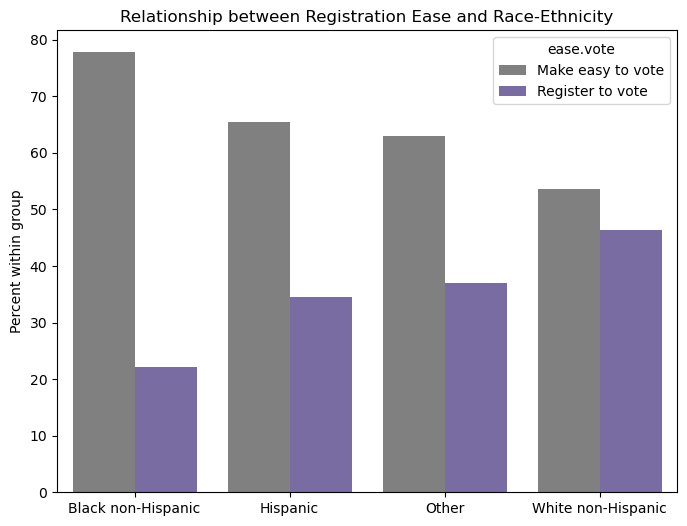

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping and calculating percentages
grouped = vote_cleaned.dropna(subset=['ease.vote', 'race']) \
    .groupby(['ease.vote', 'race']).size().reset_index(name='count')
grouped['perc'] = grouped.groupby('race')['count'].transform(lambda x: (x / x.sum()) * 100)

# Creating the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=grouped, x='race', y='perc', hue='ease.vote',
            palette=['gray', '#7463AC'], dodge=True)

# Adjusting the plot aesthetics
plt.xlabel('')
plt.ylabel('Percent within group')
plt.title('Relationship between Registration Ease and Race-Ethnicity')



Text(0.5, 1.0, 'Relationship between require vote and Race-Ethnicity')

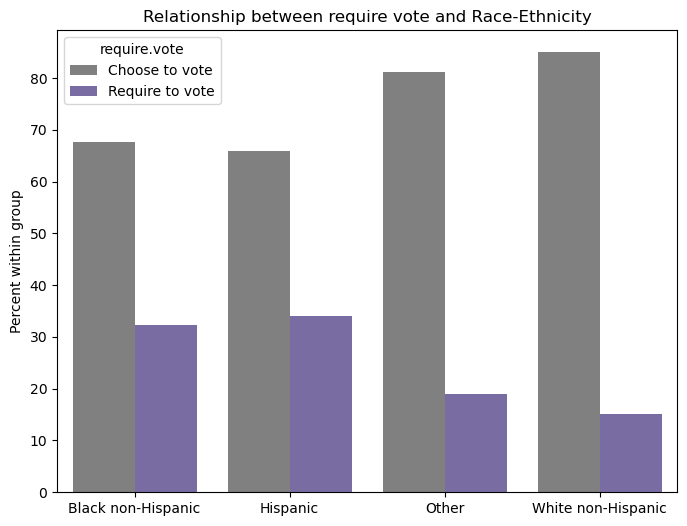

In [21]:
# Grouping and calculating percentages
grouped = vote_cleaned.dropna(subset=['require.vote', 'race']) \
    .groupby(['require.vote', 'race']).size().reset_index(name='count')
grouped['perc'] = grouped.groupby('race')['count'].transform(lambda x: (x / x.sum()) * 100)

# Creating the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=grouped, x='race', y='perc', hue='require.vote',
            palette=['gray', '#7463AC'], dodge=True)

# Adjusting the plot aesthetics
plt.xlabel('')
plt.ylabel('Percent within group')
plt.title('Relationship between require vote and Race-Ethnicity')

Interpretation from the above graph:
* This was easier to examine than the tables, and the differences were     quickly clear. 

FINAL INTERPRETATION BASED ON BOTH DESCRIPTIVE AND VISUAL EXPLORATORY DATA ANALYSIS:
* Race-ethnicity was related to opinions about voter registration and      voting requirements. 
* Specifically, there was a higher percentage of White non-Hispanic        participants supporting choosing to vote, while the highest percentage   supporting making it easy to vote were Black non-Hispanic participants.

---
## Computing and comparing observed and expected values for the groups

OBSERVED VALUES:

* It looked like there were some differences among the race-ethnicity      groups in support for ease of voter registration and for requirements    to vote. 

CHI-SQUARED TEST
* The chi-squared test is useful for testing to see if there may be a      statistical relationship between two categorical variables. 
* The chi-squared test is based on the observed values, like the ones in   the tables we created , and the values expected to occur if    there were no relationship between the variables.

That is, given overall frequencies for the two variables from the data summary, how many people would we expect to be in each of the cells of the table just shown?

### Comparing observed and expected values

* If there were no relationship between opinions on voting ease and        race-ethnicity, the observed and expected values would be the same.   
* That is, the observed data would show that 373.4 (check line 368) White   non-Hispanic people wanted to make it easy to vote.


NOTE:
* Differences between observed values and expected indicates that there    may be a relationship between the variables. 
* In this case, it looks like there are more people than expected who      want to make voting easier in all the categories, except non-Hispanic    White. 
* In the non-Hispanic White category, there are more people than expected   who want people to prove they want to vote by registering. 
* This suggests that there may be some relationship between opinions       about the ease of voting and race-ethnicity.


##############ASSUMPTIONS OF CHI-SQUARED TEST OF INDEPENDENCE############

* There are lists of requirements that must be met before using a          statistical test.

3 Assumptions:

Assumption 1:
- The variables must be nominal or ordinal (usually nominal).
  (Race has categories that are in no particular order, so it is nominal.    The ease of voting variable has categories that are in no particular     order, so it is also nominal. This assumption is met.)

Assumption 2:
- The expected values should be 5 or higher in at least 80% of groups.
  (The groups are the different cells of the table, so White non-Hispanic    participants who think people should register to vote is one group. 
   In this example, there are 8 groups, so 80% of this would be 6.4         groups. Since there is no way to have .4 of a group, 7 or more of the    groups should have expected values of 5 or more. 
   None of the groups have expected values even close to 5; all are much    higher. This assumption is met.)

Assumption 3:   
- The observations must be independent.
  (There are a couple of ways observations can be nonindependent. 
   One way to violate this assumption would be if the data included the     same set of people before and after some intervention or treatment. 
   Another way to violate this assumption would be for the data to          include siblings or parents and children or spouses or other people      who are somehow linked to one another. 
   Since people who are linked to each other often have similar             characteristics, statistical tests on related observations need to be    able to account for this, and the chi-squared test does not. 
   The Pew data included independent observations (not siblings or other    related people and not the same people measured more than once), so      this assumption is met.)

## Calculating the chi-squared statistic for the test of independence

Step 1: Summing the differences between observed and expected values
Step 2: Squaring the summed differences and dividing by their expected           value

How to compute using Python?


In [22]:
from scipy.stats import chi2_contingency

# Create a contingency table of ease of voting and race
contingency_table = pd.crosstab(vote_cleaned['ease.vote'], vote_cleaned['race'])

# Perform chi-squared test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the chi-squared statistic and p-value
print("Chi-squared statistic:", chi2)
print("p-value:", p_value)


Chi-squared statistic: 28.951544743246167
p-value: 2.2925503795395684e-06


## Using the chi-squared distribution to determine probability

Text(0, 0.5, 'Probability Density')

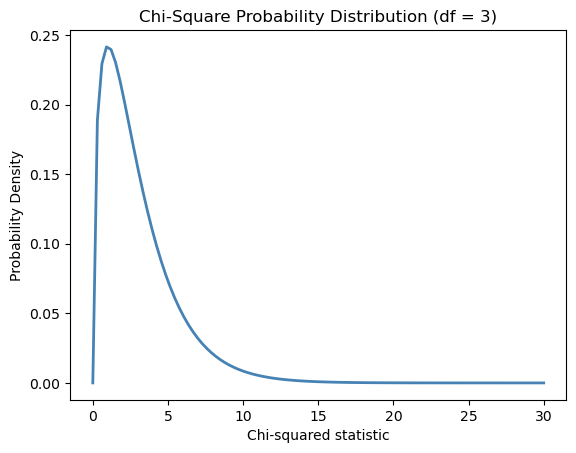

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Generate x values from 0 to 30
x = np.linspace(0, 30, 100)

# Compute the chi-square probability density function with 3 degrees of freedom
pdf = chi2.pdf(x, df=3)

# Plot the chi-square probability distribution
plt.plot(x, pdf, linewidth=2, color='steelblue')
plt.title('Chi-Square Probability Distribution (df = 3)')
plt.xlabel('Chi-squared statistic')
plt.ylabel('Probability Density')

Interpretation: 
* By the time the distribution gets to chi-squared = 20, there is so       little space under the curve that it is impossible to see. 
* Obtaining a   value of chi-squared as large as 28.952 or larger in this   sample has an extremely low probability if there were no relationship    between the two variables in the population that was sampled. 

p-value:
* In most of the fields, a p-value less than .05 is considered             statistically significant (other values like 0.1 or 0.001 could also be   used).
* Probabilities as small as .000002293 are reported as suggesting that     the differences between observed and expected are statistically          significant. 
* This does not necessarily mean the differences are important or          practically significant, just that they are bigger than what would most   likely have happened if there were no relationship in the population     between the variables involved.

* The p-value here is .000002293. 
* The probability of getting a chi-squared of 28.953 is very tiny, close   to—but not exactly—zero. 
* This is consistent with the graph showing very little space between the   distribution curve and the x-axis. 

What should we infer from having high chi-squared value and low p-value?
* A chi-squared this big, and the corresponding p-value this small, means   the observed values were much different from what we would have          expected to see if there were no relationship between opinion on voter   registration and race-ethnicity in the population sampled.

How should the above values from chi-squared test be reported?

  There was a statistically significant association between views on voting ease and race-ethnicity [χ2(3) = 28.95; p <.05].

## Using Null Hypothesis Significance Testing (NHST) to organize statistical testing

5 Steps of NHST:
* Write the null and alternate hypotheses.
* Compute the test statistic.
* Calculate the probability that your test statistic is at least as big    as it is if there is no relationship (i.e., the null is true).
* If the probability that the null is true is very small, usually less     than 5%, reject the null hypothesis.
* If the probability that the null is true is not small, usually 5% or     greater, retain the null hypothesis.

#### NHST Step 1: Write the null and alternate hypotheses

* The null hypothesis is usually a statement that claims there is no       difference or no relationship between things, whereas the alternate      hypothesis is the claim that there is a difference or a relationship     between things. 
* The null (H0) and alternate (HA or H1) hypotheses are written about the        population and are tested using a sample from the population. 
* Here are the null and alternate hypotheses for the voting data:
  
  H0: People’s opinions on voter registration are the same across              race-ethnicity groups.
  HA: People’s opinions on voter registration are not the same across          race-ethnicity groups.

#### NHST Step 2: Compute the test statistic

The test statistic to use when examining a relationship between two categorical variables is the chi-squared statistic, χ2.

In [25]:
# Create a contingency table from the vote.cleaned dataset
contingency_table = pd.crosstab(vote_cleaned['ease.vote'], vote_cleaned['race'])

# Perform the chi-squared test
chi2_statistic, p_value, degrees_of_freedom, expected_values = chi2_contingency(contingency_table)

# Print the results
print("Chi-Squared Statistic:", chi2_statistic)
print("p-value:", p_value)
print("Degrees of Freedom:", degrees_of_freedom)
print("Expected Values:", expected_values)

Chi-Squared Statistic: 28.951544743246167
p-value: 2.2925503795395684e-06
Degrees of Freedom: 3
Expected Values: [[ 74.67144319  87.70931423  43.26202661 373.35721597]
 [ 51.32855681  60.29068577  29.73797339 256.64278403]]


The test statistic is χ2 : 28.952


#### NHST Step 3: Calculate the probability that your test statistic is at least as big as it is if there is no relationship (i.e., the null is true)


The probability of seeing a chi-squared as big as 28.95 in our sample if there were no relationship in the population between opinion on voting ease and race-ethnicity group would be 0.000002293 or p < .05.


#### NHST Step 4: If the probability that the null is true is very small, usually less than 5%, reject the null hypothesis.


p = 0.000002293 or p < .05.
Hence, Rejecting null hypothesis


#### NHST Step 5: If the probability that the null is true is not small, usually 5% or greater, retain the null hypothesis


Not applicable here as p < 0.05 (i.e.,p = 0.000002293)


How to report the full interpretation after we do the five steps of NHST?????

  We used the chi-squared test to test the null hypothesis that there was   no relationship between opinions on voter registration and               race-ethnicity group. We rejected the null hypothesis and concluded      that there was a statistically significant association between views on   voter registration and race-ethnicity [χ2(3) = 28.95; p < .05].
  
  
NOTE the difference between chi-squared test of independence vs goodness-of-fit:

* The chi-squared test of independence tests whether there is a relationship between two categorical variables. 
* The chi-squared goodness-of-fit test is used in a different situation. 
* Specifically, the chi-squared goodness-of-fit test is used for           comparing the values of a single categorical variable to values from a   hypothesized or population variable. 
* The goodness-of-fit test is often used when trying to determine if a     sample is a good representation of the population.

Example:
H0: The proportions of people in each race-ethnicity category in the sample are the same as the proportions of people in each race-ethnicity category in the U.S. population.
HA: The proportions of people in each race-ethnicity category in the sample are not the same as the proportions of people in each race-ethnicity category in the U.S. population.

LIMITATION OF CHI-SQUARED INDEPENDENCE TEST:
* It determines whether or not there is a statistically significant        relationship between two categorical variables but does not identify     what makes the relationship significant. 

## Using standardized residuals following chi-squared tests

* Standardized residuals (like z-scores) can aid analysts in determining   which of the observed frequencies are significantly larger or smaller    than expected. 
* The standardized residual is computed by subtracting the expected value   in a cell from the observed value in a cell and dividing by the square   root of the expected value
* The resulting value is the standardized residual and is distributed      like a z-score. 
* Values of the standardized residuals that are higher than 1.96 or lower   than –1.96 indicate that the observed value in that group is much        higher or lower than the expected value. 
* These are the groups that are contributing the most to a large           chi-squared statistic and could be examined further and included in the   interpretation.
* Standardized residuals are available with the chi-squared statistic      from the CrossTable() function in the descr package.

In [26]:
import scipy.stats as stats
import statsmodels.api as sm

# Create a cross-tabulation table
cross_table = pd.crosstab(vote_cleaned['ease.vote'], vote_cleaned['race'])

# Perform the chi-squared test
chi2, p, _, expected = stats.chi2_contingency(cross_table)

# Create a new cross-tabulation table with expected values
expected_table = pd.DataFrame(expected, index=cross_table.index, columns=cross_table.columns)

# Calculate the standardized residuals
residuals = (cross_table - expected_table) / np.sqrt(expected_table)

# Print the cross-tabulation table, chi-squared test results, and standardized residuals
print("Cross-Tabulation Table:")
print(cross_table)
print("\nChi-Squared Statistic:", chi2)
print("p-value:", p)
print("\nExpected Values:")
print(expected_table)
print("\nStandardized Residuals:")
print(residuals)


Cross-Tabulation Table:
race               Black non-Hispanic  Hispanic  Other  White non-Hispanic
ease.vote                                                                 
Make easy to vote                  98        97     46                 338
Register to vote                   28        51     27                 292

Chi-Squared Statistic: 28.951544743246167
p-value: 2.2925503795395684e-06

Expected Values:
race               Black non-Hispanic   Hispanic      Other  \
ease.vote                                                     
Make easy to vote           74.671443  87.709314  43.262027   
Register to vote            51.328557  60.290686  29.737973   

race               White non-Hispanic  
ease.vote                              
Make easy to vote          373.357216  
Register to vote           256.642784  

Standardized Residuals:
race               Black non-Hispanic  Hispanic     Other  White non-Hispanic
ease.vote                                                          

* Values of the standardized residuals that are higher than 1.96 or lower   than –1.96 indicate that the observed value in that group is much        higher or lower than the expected value. 


Interpretation:

* The standardized residuals are shown in the last row of each cell (see   the key at the top of the table to figure this out) with an absolute     value higher than 1.96 in the White non-Hispanic group for “Register to   vote” (std. res. = 2.207) and Black non-Hispanic group for both          categories; the standardized residual was –3.256 for “Register to vote”   and 2.700 for “Make easy to vote.”
* The 2.207 value for White non-Hispanic who selected “Register to vote”   indicates that more White non-Hispanic people than expected selected     that option. 
* The –3.256 for Black non-Hispanic indicated that fewer Black             non-Hispanic people than expected selected “Register to vote.”
* Finally,the 2.700 for Black non-Hispanic indicated that more Black       non-Hispanic people than expected selected “Make easy to vote.” 
* The Hispanic and Other race-ethnicity groups did not have more or fewer   than expected observations in either category. 
* The significant chi-squared result was driven by more White              non-Hispanic and fewer Black non-Hispanic people feeling that people     should prove they want to vote by registering and more Black             non-Hispanic people feeling that the process for voting should be made   easier.


How to report the added interpretation from above??????

  We used the chi-squared test to test the null hypothesis that there was   no relationship between opinions on voter registration by                race-ethnicity group. We rejected the null hypothesis and concluded      that there was a statistically significant association between views on   voter registration and race-ethnicity [χ2(3) = 28.95; p < .05]. Based    on standardized residuals, the statistically significant chi-squared     test result was driven by more White non-Hispanic participants and       fewer Black non-Hispanic participants than expected believe that people   should prove they want to vote by registering, and more Black            non-Hispanic participants than expected believe that the voting process   should be made easier.

---
## Computing and interpreting effect sizes to understand the strength of a significant chi-squared relationship

* Computing the Cramér’s V statistic

  The strength of a relationship in statistics is referred to as effect    size. 
  For chi-squared, there are a few options, including the commonly used    effect size statistic of Cramér’s V.
          V = square_root(χ2/(n(k-1))) 

In voting example, k=2 (two categories of voting easy variable)
      n =977 (check line 326)
      χ2= 28.952 (check line 434)
      
  V= square_root(28.952/(977(2-1)))= 0.17

In [27]:
import pandas as pd
import numpy as np
import scipy.stats as stats

def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a cross-tabulation table
cross_table = pd.crosstab(vote_cleaned['ease.vote'], vote_cleaned['race'])

# Compute Cramér's V
cramers_v_value = cramers_v(cross_table.values)

print("Cramér's V:", cramers_v_value)


Cramér's V: 0.1630539053135831


How to interpret Cramer's V?
* Small or weak effect size for V = .1
* Medium or moderate effect size for V = .3
* Large or strong effect size for V = .5

In this case, the effect size is between small and medium. 

Interpretation:

There is a statistically significant relationship between opinions on voter registration and race-ethnicity, and the relationship is weak to moderate. 

## An example of chi-squared for two binary variables

####################################################

NHST Step 1: Write the null and alternate hypotheses

####################################################

H0: Opinions on voter registration are the same by home ownership status.
HA: Opinions on voter registration are not the same by home ownership status.

#################################################

NHST Step 2: Compute the test statistic

#################################################


In [28]:
# Create a contingency table
contingency_table = pd.crosstab(vote_cleaned['ease.vote'], vote_cleaned['ownhome'])

# Perform chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the chi-squared test results
print("Chi-squared statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)

Chi-squared statistic: 5.898905291286223
p-value: 0.01515029832224896
Degrees of freedom: 1


#########################################################################

Step 3: Calculate the probability that your test statistic is at least as big as it is if there is no relationship (i.e., the null is true)

#########################################################################

The p-value is .0152.

###############################################################

Step 4 and 5:Interpret the probability and write a conclusion

###############################################################

There was a statistically significant relationship between opinion on registering to vote and home ownership [χ2(1) = 5.90; p = .02].